1. Imports 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2. Loading the dataset

In [2]:
titanic = sns.load_dataset('titanic')

3. Quick Look into the dataset

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


4. Summary statistics

In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


5. Basic Information

a) How many people who survived and died from the titanic crash? Can you use the appropriate visualization to show these people?

In [8]:
titanic['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

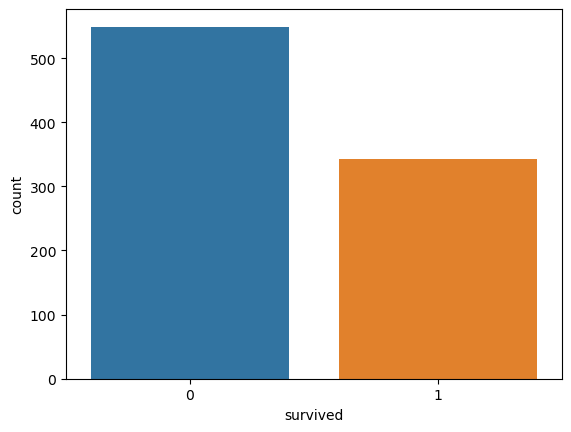

In [9]:
sns.countplot(data=titanic, x='survived')

b) How many pclass are there in the dataset? I it the same as the the text column class?

In [10]:
titanic['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [11]:
titanic['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [12]:
p_class = titanic[['pclass', 'class']]
p_class.head()

,pclass,class
0,3,Third
1,1,First
2,3,Third
3,1,First
4,3,Third


c) How many genders are there in the dataset?

In [13]:
titanic['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

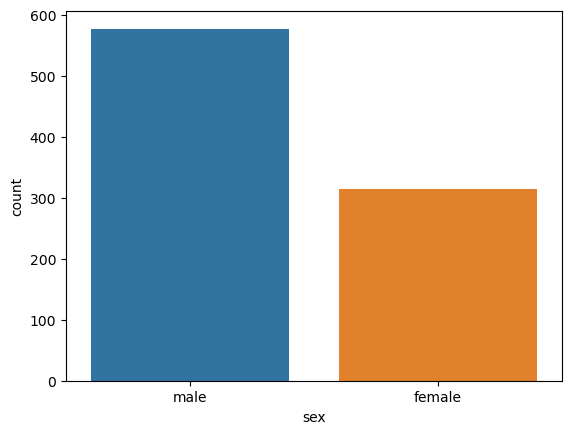

In [14]:
sns.countplot(data=titanic, x='sex')

d) Show the passengers who were less than 20 years.

In [15]:
less_than_20 = titanic[titanic['age'] < 20 ]

less_than_20.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False


In [16]:
len(less_than_20)

164

e) Show the categories of the passengers in the column who. Use Pie chart to illustrate their values

<Axes: ylabel='count'>

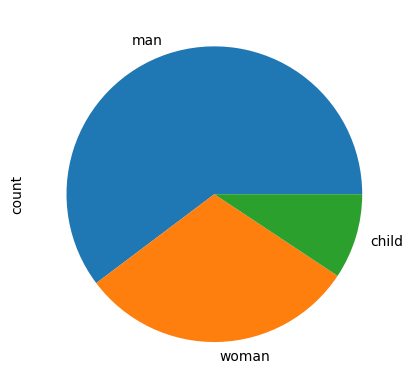

In [17]:
titanic.who.value_counts().plot(kind='pie')

f) How many unique cities are there in the column embark_town? Plot their occurences.

In [18]:
titanic['embark_town'].nunique()

3

<Axes: xlabel='embark_town'>

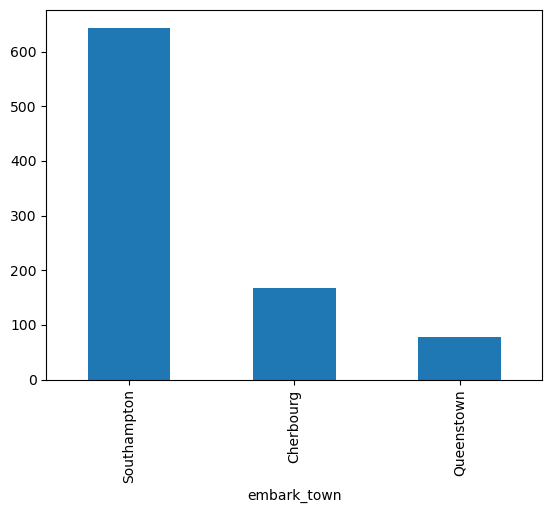

In [19]:
titanic['embark_town'].value_counts().plot(kind='bar')

6. Missing Data

In [20]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

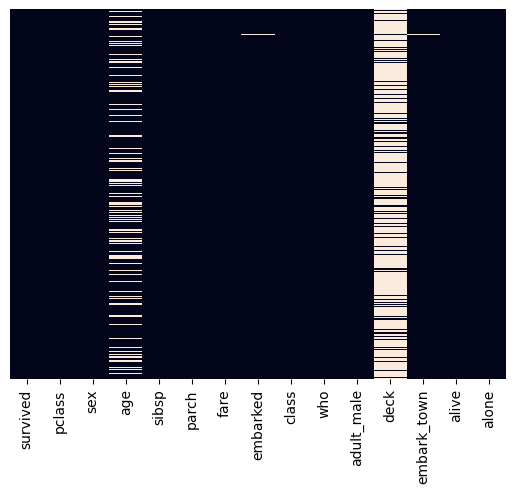

In [21]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False)

7. More Analysis

<Axes: xlabel='survived', ylabel='count'>

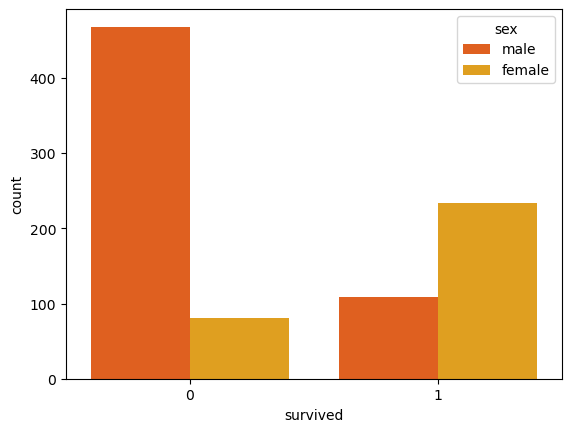

In [22]:
sns.countplot(data=titanic, x='survived', palette='autumn', hue='sex')

<Axes: xlabel='survived', ylabel='count'>

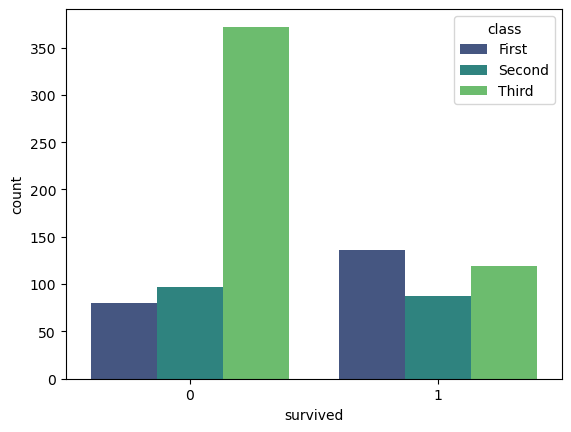

In [23]:
sns.countplot(data=titanic, x='survived', palette='viridis', hue='class')

<Axes: ylabel='Frequency'>

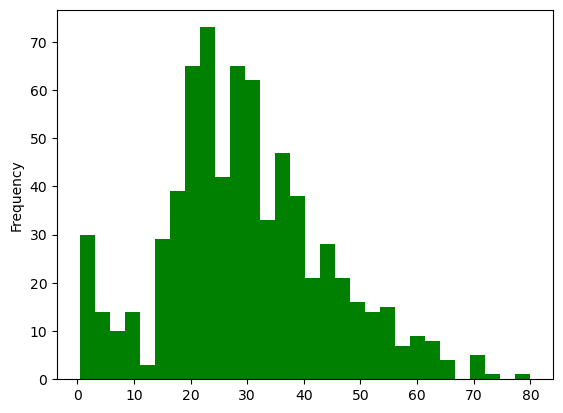

In [24]:
titanic.age.plot(kind='hist',bins=30,color='green')

<Axes: xlabel='age', ylabel='fare'>

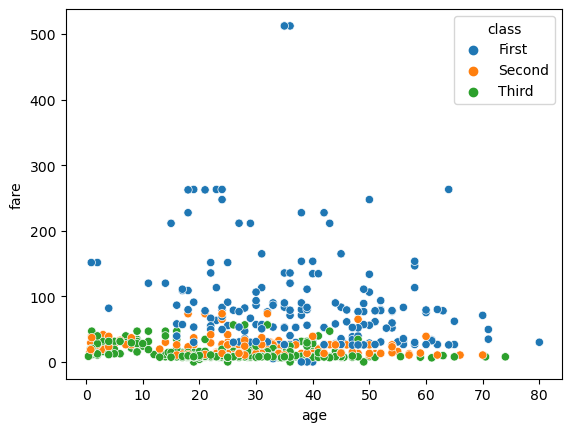

In [25]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='class')

<Axes: xlabel='age', ylabel='fare'>

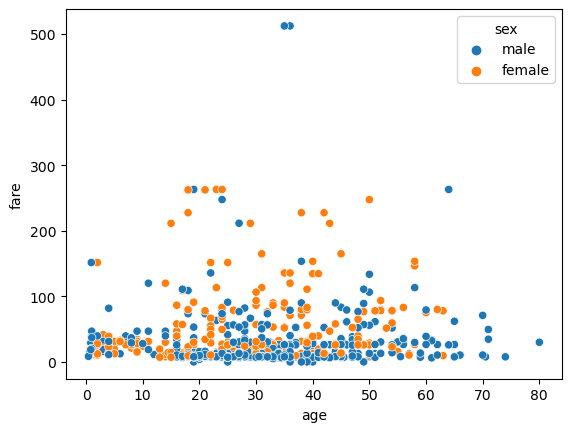

In [26]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex')

The purpose of this lab was to learn about the exploratory analysis. There is no limit to what you can do. The more time you spend with the data, the good your analysis will be. I used questions to make it simple and lead the way but there is no proper format for this. The goal is to be one with data (CC: Andrej).

8. Checking Correlating Features

Checking correlation can help you to see the similarity between features. If two features correlate, that means they contain the same information and if one of them is removed, the analysis/model can be less affected.

In [28]:
correlation = titanic.select_dtypes(include='number').corr()
correlation

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [29]:
correlation['survived']

survived    1.000000
pclass     -0.338481
age        -0.077221
sibsp      -0.035322
parch       0.081629
fare        0.257307
Name: survived, dtype: float64

<Axes: >

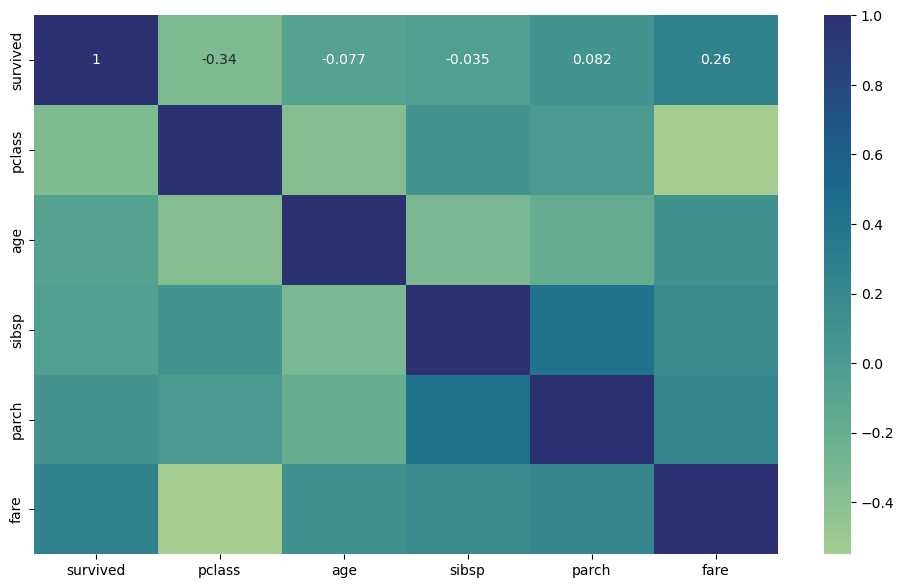

In [30]:
#### Visualizing correlation

plt.figure(figsize=(12,7))

sns.heatmap(correlation,annot=True,cmap='crest')